In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

- 이 초기화 메서드의 인수는 어휘수(vocab_size)와 은닉층의 뉴런수(hidden_size)
- 가중치 초기화 부분에서 가중치 2개 생성(W_in, W_out), 이 두 가중치는 각각 작은 무작위 값으로 초기화, 넘파이 배열의 데이터타입 astype('f')로 지정

- 입력층의 MatMul계층을 2개, 출력층의 MatMul계층 1개, softmax with loss 계층 1개.
- 입력 측의 맥락을 처리하는 MatMul계층은 매락에서 사용하는 단어수(윈도우크기)만큼 단들어야 함.
- 입력 측 MatMul계층들은 모두 같은 가중치를 이용하도록 초기화.
- 매개변수와 시울기를 인스턴스 변수인 params와 grads리스트에 모아둠.

In [2]:
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

- 이 메서드는 인수로 맥락(contexts)과 타깃(target)을 받아 손실(loss)를 반환.
- 이 배열의 형상은 (6,2,7)
   - 0번째 차원의 원소 수는 미니배치 수 만큼
   - 1번째 차원의 원소 수는 맥락의 윈도우 크기 
   - 2차째 차원은 원핫 벡터
- target의 형상은 2차원으로, (6,7)

In [3]:
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

## 3.4.1 학습 코드 구현


| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 671 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 672 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 673 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 674 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 675 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 676 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 677 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 678 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 679 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 680 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 681 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 682 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 683 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 684 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 685 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 686 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 687 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 688 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 689 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 690 |  반복 1

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/a

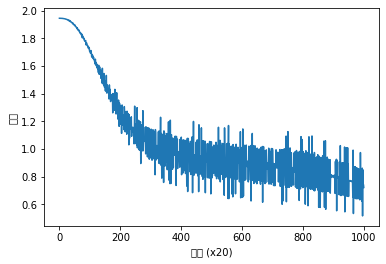

In [7]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from common.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [8]:
# 학습이 끝난 후의 가중치 매개변수

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-1.229477   -0.9947957   0.91778874  0.9517897  -1.5329708 ]
say [ 1.1552618  1.0649383 -1.1006168 -1.1054285 -1.2475368]
goodbye [-0.57894796 -0.94813514  0.9986563   0.9790502  -0.31020257]
and [ 0.69205326  0.98324186 -0.9432014  -0.8233866  -1.8624568 ]
i [-0.5669762  -0.9510655   1.013562    0.9678978  -0.32381415]
hello [-1.2371722 -0.9848564  0.9247163  0.9244966 -1.5358343]
. [ 1.2688537   0.8568272  -0.9450417  -1.1243602   0.54797304]
